In [1]:
 !pip install -q hvplot
 !pip install MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install -U som-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [54]:
data = pd.read_csv("results.csv",encoding='windows-1254')

In [55]:
data

Season              DateTime     HomeTeam        AwayTeam  FTHG  FTAG  \
0      1993-94  1993-08-14T00:00:00Z      Arsenal        Coventry     0     3   
1      1993-94  1993-08-14T00:00:00Z  Aston Villa             QPR     4     1   
2      1993-94  1993-08-14T00:00:00Z      Chelsea       Blackburn     1     2   
3      1993-94  1993-08-14T00:00:00Z    Liverpool  Sheffield Weds     2     0   
4      1993-94  1993-08-14T00:00:00Z     Man City           Leeds     1     1   
...        ...                   ...          ...             ...   ...   ...   
11108  2021-22  2022-04-09T17:30:00Z  Aston Villa       Tottenham     0     4   
11109  2021-22  2022-04-10T14:00:00Z    Brentford        West Ham     2     0   
11110  2021-22  2022-04-10T14:00:00Z    Leicester  Crystal Palace     2     1   
11111  2021-22  2022-04-10T14:00:00Z      Norwich         Burnley     2     0   
11112  2021-22  2022-04-10T16:30:00Z     Man City       Liverpool     2     2   

      FTR  HTHG  HTAG  HTR  ...  HST  AST   HC   AC    HF    AF   HY   AY  \
0       A   NaN   NaN  NaN  ...  NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN   
1       H   NaN   NaN  NaN  ...  NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN   
2       A   NaN   NaN  NaN  ...  NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN   
3       H   NaN   NaN  NaN  ...  NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN   
4       D   NaN   NaN  NaN  ...  NaN  NaN  NaN  NaN   NaN   NaN  NaN  NaN   
...    ..   ...   ...  ...  ...  ...  ...  ...  ...   ...   ...  ...  ...   
11108   A   0.0   1.0    A  ...  8.0  5.0  9.0  3.0  12.0  14.0  2.0  3.0   
11109   H   0.0   0.0    D  ...  7.0  1.0  4.0  6.0   2.0   6.0  0.0  1.0   
11110   H   2.0   0.0    H  ...  3.0  3.0  3.0  4.0  11.0  12.0  1.0  1.0   
11111   H   1.0   0.0    H  ...  6.0  4.0  6.0  7.0  12.0  10.0  1.0  1.0   
11112   D   2.0   1.0    H  ...  5.0  4.0  4.0  1.0   9.0  11.0  1.0  4.0   

        HR   AR  
0      NaN  NaN  
1      NaN  NaN  
2      NaN  NaN  
3      NaN  NaN  
4      NaN  NaN  
...    ...  ...  
11108  0.0  0.0  
11109  0.0  0.0  
11110  0.0  0.0  
11111  0.0  0.0  
11112  0.0  0.0  

[11113 rows x 23 columns]

In [56]:
data_copy_1=data.copy()

from sklearn import preprocessing
data_copy_1=data_copy_1.iloc[8904:11113]

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [57]:
data_copy_1.drop('Referee', axis=1, inplace=True)


In [58]:
data_copy_1.head()

Season              DateTime        HomeTeam    AwayTeam  FTHG  FTAG  \
8904  2016-17  2016-08-13T00:00:00Z         Burnley     Swansea     0     1   
8905  2016-17  2016-08-13T00:00:00Z  Crystal Palace   West Brom     0     1   
8906  2016-17  2016-08-13T00:00:00Z         Everton   Tottenham     1     1   
8907  2016-17  2016-08-13T00:00:00Z            Hull   Leicester     2     1   
8908  2016-17  2016-08-13T00:00:00Z        Man City  Sunderland     2     1   

     FTR  HTHG  HTAG HTR  ...  HST  AST   HC   AC    HF    AF   HY   AY   HR  \
8904   A   0.0   0.0   D  ...  3.0  9.0  7.0  4.0  10.0  14.0  3.0  2.0  0.0   
8905   A   0.0   0.0   D  ...  4.0  3.0  3.0  6.0  12.0  15.0  2.0  2.0  0.0   
8906   D   1.0   0.0   H  ...  6.0  4.0  5.0  6.0  10.0  14.0  0.0  0.0  0.0   
8907   H   1.0   0.0   H  ...  5.0  5.0  5.0  3.0   8.0  17.0  2.0  2.0  0.0   
8908   H   1.0   0.0   H  ...  4.0  3.0  9.0  6.0  11.0  14.0  1.0  2.0  0.0   

       AR  
8904  0.0  
8905  0.0  
8906  0.0  
8907  0.0  
8908  0.0  

[5 rows x 22 columns]

In [59]:
data_copy_1["matchDate"] = pd.to_datetime(data_copy_1["DateTime"], infer_datetime_format=True)
data_copy_1['matchDay'] = data_copy_1['matchDate'].dt.day_name()
print(data_copy_1["matchDate"][8904])
print(data_copy_1['matchDay'][9052])
data_copy_1.drop('DateTime', axis=1, inplace=True)
data_copy_1.drop('matchDate', axis=1, inplace=True)

2016-08-13 00:00:00
Sunday


In [60]:
data_copy_1 = pd.get_dummies(data_copy_1, columns = ['HomeTeam'])
data_copy_1 = pd.get_dummies(data_copy_1, columns = ['AwayTeam'])
data_copy_1 = pd.get_dummies(data_copy_1, columns = ['HTR'])
data_copy_1 = pd.get_dummies(data_copy_1, columns = ['matchDay'])

In [61]:
data_copy_1.head()

Season  FTHG  FTAG FTR  HTHG  HTAG    HS    AS  HST  AST  ...  HTR_A  \
8904  2016-17     0     1   A   0.0   0.0  10.0  17.0  3.0  9.0  ...      0   
8905  2016-17     0     1   A   0.0   0.0  14.0  13.0  4.0  3.0  ...      0   
8906  2016-17     1     1   D   1.0   0.0  12.0  13.0  6.0  4.0  ...      0   
8907  2016-17     2     1   H   1.0   0.0  14.0  18.0  5.0  5.0  ...      0   
8908  2016-17     2     1   H   1.0   0.0  16.0   7.0  4.0  3.0  ...      0   

      HTR_D  HTR_H  matchDay_Friday  matchDay_Monday  matchDay_Saturday  \
8904      1      0                0                0                  1   
8905      1      0                0                0                  1   
8906      0      1                0                0                  1   
8907      0      1                0                0                  1   
8908      0      1                0                0                  1   

      matchDay_Sunday  matchDay_Thursday  matchDay_Tuesday  matchDay_Wednesday  
8904                0                  0                 0                   0  
8905                0                  0                 0                   0  
8906                0                  0                 0                   0  
8907                0                  0                 0                   0  
8908                0                  0                 0                   0  

[5 rows x 90 columns]

In [62]:
# Encode labels in column 'species'.
data_copy_1['FTR']= label_encoder.fit_transform(data_copy_1['FTR'])
  
data_copy_1['FTR'].unique()

array([0, 1, 2])

In [63]:
label_1 = np.ravel(data_copy_1['FTR'])
features_1 = data_copy_1.iloc[:,4:90]

In [64]:
label_1

array([0, 0, 1, ..., 2, 2, 1])

In [65]:
data_copy_1

Season  FTHG  FTAG  FTR  HTHG  HTAG    HS    AS  HST  AST  ...  HTR_A  \
8904   2016-17     0     1    0   0.0   0.0  10.0  17.0  3.0  9.0  ...      0   
8905   2016-17     0     1    0   0.0   0.0  14.0  13.0  4.0  3.0  ...      0   
8906   2016-17     1     1    1   1.0   0.0  12.0  13.0  6.0  4.0  ...      0   
8907   2016-17     2     1    2   1.0   0.0  14.0  18.0  5.0  5.0  ...      0   
8908   2016-17     2     1    2   1.0   0.0  16.0   7.0  4.0  3.0  ...      0   
...        ...   ...   ...  ...   ...   ...   ...   ...  ...  ...  ...    ...   
11108  2021-22     0     4    0   0.0   1.0   9.0  11.0  8.0  5.0  ...      1   
11109  2021-22     2     0    2   0.0   0.0  15.0   5.0  7.0  1.0  ...      0   
11110  2021-22     2     1    2   2.0   0.0  12.0  11.0  3.0  3.0  ...      0   
11111  2021-22     2     0    2   1.0   0.0  17.0  18.0  6.0  4.0  ...      0   
11112  2021-22     2     2    1   2.0   1.0  11.0   6.0  5.0  4.0  ...      0   

       HTR_D  HTR_H  matchDay_Friday  matchDay_Monday  matchDay_Saturday  \
8904       1      0                0                0                  1   
8905       1      0                0                0                  1   
8906       0      1                0                0                  1   
8907       0      1                0                0                  1   
8908       0      1                0                0                  1   
...      ...    ...              ...              ...                ...   
11108      0      0                0                0                  1   
11109      1      0                0                0                  0   
11110      0      1                0                0                  0   
11111      0      1                0                0                  0   
11112      0      1                0                0                  0   

       matchDay_Sunday  matchDay_Thursday  matchDay_Tuesday  \
8904                 0                  0                 0   
8905                 0                  0                 0   
8906                 0                  0                 0   
8907                 0                  0                 0   
8908                 0                  0                 0   
...                ...                ...               ...   
11108                0                  0                 0   
11109                1                  0                 0   
11110                1                  0                 0   
11111                1                  0                 0   
11112                1                  0                 0   

       matchDay_Wednesday  
8904                    0  
8905                    0  
8906                    0  
8907                    0  
8908                    0  
...                   ...  
11108                   0  
11109                   0  
11110                   0  
11111                   0  
11112                   0  

[2209 rows x 90 columns]

In [66]:
data_copy_1['FTR']

8904     0
8905     0
8906     1
8907     2
8908     2
        ..
11108    0
11109    2
11110    2
11111    2
11112    1
Name: FTR, Length: 2209, dtype: int64

In [52]:
y

array([0, 0, 1, ..., 2, 2, 1])

In [67]:
# train -> features = data_copy.iloc[:,4:90]
# make it numpy array so the keras model accept it by using " .values "
X = features_1
# target -> label = data_copy['FTR']
# make it numpy array so the keras model accept it by using " .values "
y = label_1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [68]:
print("The shape of X_train is " , X_train.shape)
print("The size of y_train is " , y_train.shape)
print("The size of X_test set is " , X_test.shape)
print("The size of y_test is " , y_test.shape)

The shape of X_train is  (1546, 86)
The size of y_train is  (1546,)
The size of X_test set is  (663, 86)
The size of y_test is  (663,)


In [69]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)
print("The size of y_train is " + str(y_train.shape))
print("The size of y_test is " + str(y_test.shape))
print(y_train[0])

The size of y_train is (1546, 3)
The size of y_test is (663, 3)
[0. 0. 1.]


In [70]:
# split the data train and test for the target and the features 


In [71]:
y_train

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [104]:
from pandas import read_csv
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf


model = tf.keras.models.Sequential([
tf.keras.layers.Dense(300, input_dim=86, activation='relu', kernel_initializer='he_normal'),
tf.keras.layers.Dense(200, activation='relu', kernel_initializer='he_normal'),
tf.keras.layers.Dense(3, activation='linear')
])
# compile the keras model
model.compile(loss='mse', optimizer='adam')
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)
# evaluate on test set

# yhat = np.argmax(model.predict(X_test),axis=-1)

#yhat = model.predict(X_test)
# error = mean_absolute_error(y_test, yhat)
# print('MAE: %.3f' % error)

# yhat = model.predict(X_test)
# yhat = yhat.astype('int')
# acc = accuracy_score(y_test, yhat)
# print('Accuracy: %.3f' % acc)
# print(yhat)
#print(yhat)

# acc = (model.evaluate(X_test,y_test))
# print('Accuracy:',  acc[1])

Epoch 1/50
49/49 - 1s - loss: 0.9374 - 535ms/epoch - 11ms/step
Epoch 2/50
49/49 - 0s - loss: 0.2465 - 154ms/epoch - 3ms/step
Epoch 3/50
49/49 - 0s - loss: 0.2147 - 173ms/epoch - 4ms/step
Epoch 4/50
49/49 - 0s - loss: 0.1940 - 133ms/epoch - 3ms/step
Epoch 5/50
49/49 - 0s - loss: 0.2044 - 166ms/epoch - 3ms/step
Epoch 6/50
49/49 - 0s - loss: 0.1827 - 175ms/epoch - 4ms/step
Epoch 7/50
49/49 - 0s - loss: 0.1869 - 163ms/epoch - 3ms/step
Epoch 8/50
49/49 - 0s - loss: 0.1718 - 148ms/epoch - 3ms/step
Epoch 9/50
49/49 - 0s - loss: 0.1632 - 147ms/epoch - 3ms/step
Epoch 10/50
49/49 - 0s - loss: 0.1322 - 153ms/epoch - 3ms/step
Epoch 11/50
49/49 - 0s - loss: 0.1333 - 151ms/epoch - 3ms/step
Epoch 12/50
49/49 - 0s - loss: 0.1446 - 139ms/epoch - 3ms/step
Epoch 13/50
49/49 - 0s - loss: 0.1455 - 166ms/epoch - 3ms/step
Epoch 14/50
49/49 - 0s - loss: 0.1439 - 155ms/epoch - 3ms/step
Epoch 15/50
49/49 - 0s - loss: 0.1503 - 151ms/epoch - 3ms/step
Epoch 16/50
49/49 - 0s - loss: 0.1443 - 146ms/epoch - 3ms/step


In [105]:
# yhat = np.argmax(model.predict(X_test),axis=1)
# acc = accuracy_score(y_test, yhat)
# print('Accuracy: %.3f' % acc)
model.evaluate(X_test,y_test)
#np.argmax(model.predict(X_test),axis=1)

21/21 [==============================] - 0s 2ms/step - loss: 0.2234


0.2233894318342209

In [106]:
np.argmax(model.predict(X_test),axis=-1)

21/21 [==============================] - 0s 2ms/step


array([2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2,
       0, 1, 1, 0, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 0, 2, 0, 2, 2, 1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2,
       2, 2, 2, 2, 2, 1, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 0, 2, 0,
       1, 0, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 1, 2, 2, 2, 0,
       0, 0, 1, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 0, 2, 2, 1, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 1,
       2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 2, 2, 1,
       2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 1,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 0, 0, 2, 1, 2,
       2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 0, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2,

In [107]:
Xnew = np.array([[0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 1]])

In [108]:
Xnew.shape

(1, 86)

In [109]:
ynew = np.argmax(model.predict(Xnew), axis=-1)
print("Prediction = %s" % ynew[0])


1/1 [==============================] - 0s 58ms/step
Prediction = 0


In [ ]:
ynew

array([0])

In [ ]:
X_train

array([[ 2.,  0.,  9., ...,  0.,  0.,  0.],
       [ 0.,  0., 15., ...,  0.,  0.,  0.],
       [ 0.,  1., 16., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0., 15., ...,  0.,  0.,  0.],
       [ 0.,  0., 17., ...,  0.,  0.,  0.],
       [ 1.,  2., 16., ...,  0.,  0.,  0.]])

In [ ]:
y_train

array([2, 1, 0, ..., 0, 2, 2])

In [ ]:
X_test

array([[ 1.,  0., 18., ...,  0.,  0.,  0.],
       [ 0.,  1.,  5., ...,  0.,  0.,  0.],
       [ 2.,  0., 12., ...,  0.,  1.,  0.],
       ...,
       [ 0.,  1.,  8., ...,  0.,  0.,  0.],
       [ 2.,  0., 10., ...,  0.,  0.,  0.],
       [ 1.,  0., 15., ...,  0.,  0.,  0.]])

In [ ]:
y_

In [ ]:
yhat = model.predict(Xnew)
# error = mean_absolute_error(y_test, yhat)
# print('MAE: %.3f' % error)
# print(yhat)
print(np.argmax(yhat,axis=1))


1/1 [==============================] - 0s 67ms/step
[0]


In [ ]:
data=data.iloc[8904:11113]

In [ ]:
data

Season              DateTime        HomeTeam        AwayTeam  FTHG  \
8904   2016-17  2016-08-13T00:00:00Z         Burnley         Swansea     0   
8905   2016-17  2016-08-13T00:00:00Z  Crystal Palace       West Brom     0   
8906   2016-17  2016-08-13T00:00:00Z         Everton       Tottenham     1   
8907   2016-17  2016-08-13T00:00:00Z            Hull       Leicester     2   
8908   2016-17  2016-08-13T00:00:00Z        Man City      Sunderland     2   
...        ...                   ...             ...             ...   ...   
11108  2021-22  2022-04-09T17:30:00Z     Aston Villa       Tottenham     0   
11109  2021-22  2022-04-10T14:00:00Z       Brentford        West Ham     2   
11110  2021-22  2022-04-10T14:00:00Z       Leicester  Crystal Palace     2   
11111  2021-22  2022-04-10T14:00:00Z         Norwich         Burnley     2   
11112  2021-22  2022-04-10T16:30:00Z        Man City       Liverpool     2   

       FTAG FTR  HTHG  HTAG HTR  ...  HST  AST   HC   AC    HF    AF   HY  \
8904      1   A   0.0   0.0   D  ...  3.0  9.0  7.0  4.0  10.0  14.0  3.0   
8905      1   A   0.0   0.0   D  ...  4.0  3.0  3.0  6.0  12.0  15.0  2.0   
8906      1   D   1.0   0.0   H  ...  6.0  4.0  5.0  6.0  10.0  14.0  0.0   
8907      1   H   1.0   0.0   H  ...  5.0  5.0  5.0  3.0   8.0  17.0  2.0   
8908      1   H   1.0   0.0   H  ...  4.0  3.0  9.0  6.0  11.0  14.0  1.0   
...     ...  ..   ...   ...  ..  ...  ...  ...  ...  ...   ...   ...  ...   
11108     4   A   0.0   1.0   A  ...  8.0  5.0  9.0  3.0  12.0  14.0  2.0   
11109     0   H   0.0   0.0   D  ...  7.0  1.0  4.0  6.0   2.0   6.0  0.0   
11110     1   H   2.0   0.0   H  ...  3.0  3.0  3.0  4.0  11.0  12.0  1.0   
11111     0   H   1.0   0.0   H  ...  6.0  4.0  6.0  7.0  12.0  10.0  1.0   
11112     2   D   2.0   1.0   H  ...  5.0  4.0  4.0  1.0   9.0  11.0  1.0   

        AY   HR   AR  
8904   2.0  0.0  0.0  
8905   2.0  0.0  0.0  
8906   0.0  0.0  0.0  
8907   2.0  0.0  0.0  
8908   2.0  0.0  0.0  
...    ...  ...  ...  
11108  3.0  0.0  0.0  
11109  1.0  0.0  0.0  
11110  1.0  0.0  0.0  
11111  1.0  0.0  0.0  
11112  4.0  0.0  0.0  

[2209 rows x 23 columns]

(16.5, -0.5)

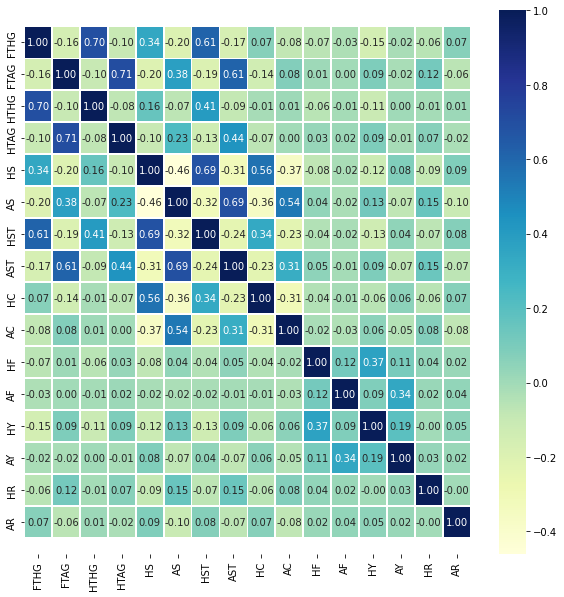

In [ ]:
corrleation_matrix=data.corr()
fig,ax=plt.subplots(figsize=(10,10))
ax=sns.heatmap(corrleation_matrix,annot=True,linewidths=0.8,fmt=".2f",cmap="YlGnBu");
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

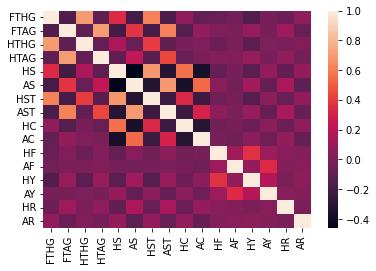

In [ ]:
df = pd.DataFrame(data)

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False)
plt.show()

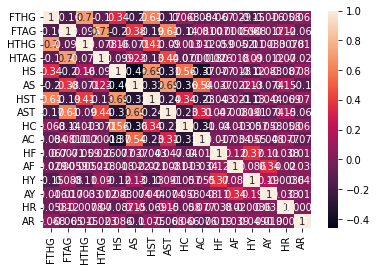

In [ ]:
df = pd.DataFrame(data)

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

Text(0, 0.5, 'Index')

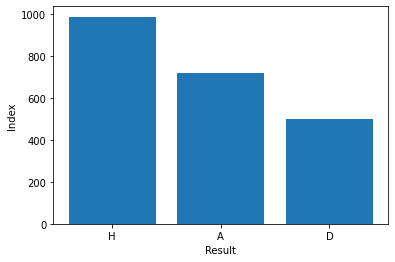

In [ ]:
fig,ax=plt.subplots()
Full_Time_Results=data['FTR'].value_counts()

Index=Full_Time_Results.index
Resuls=Full_Time_Results.values

ax.bar(Index,Resuls)
ax.set_xlabel('Result')
ax.set_ylabel('Index')

Text(0, 0.5, 'Matches')

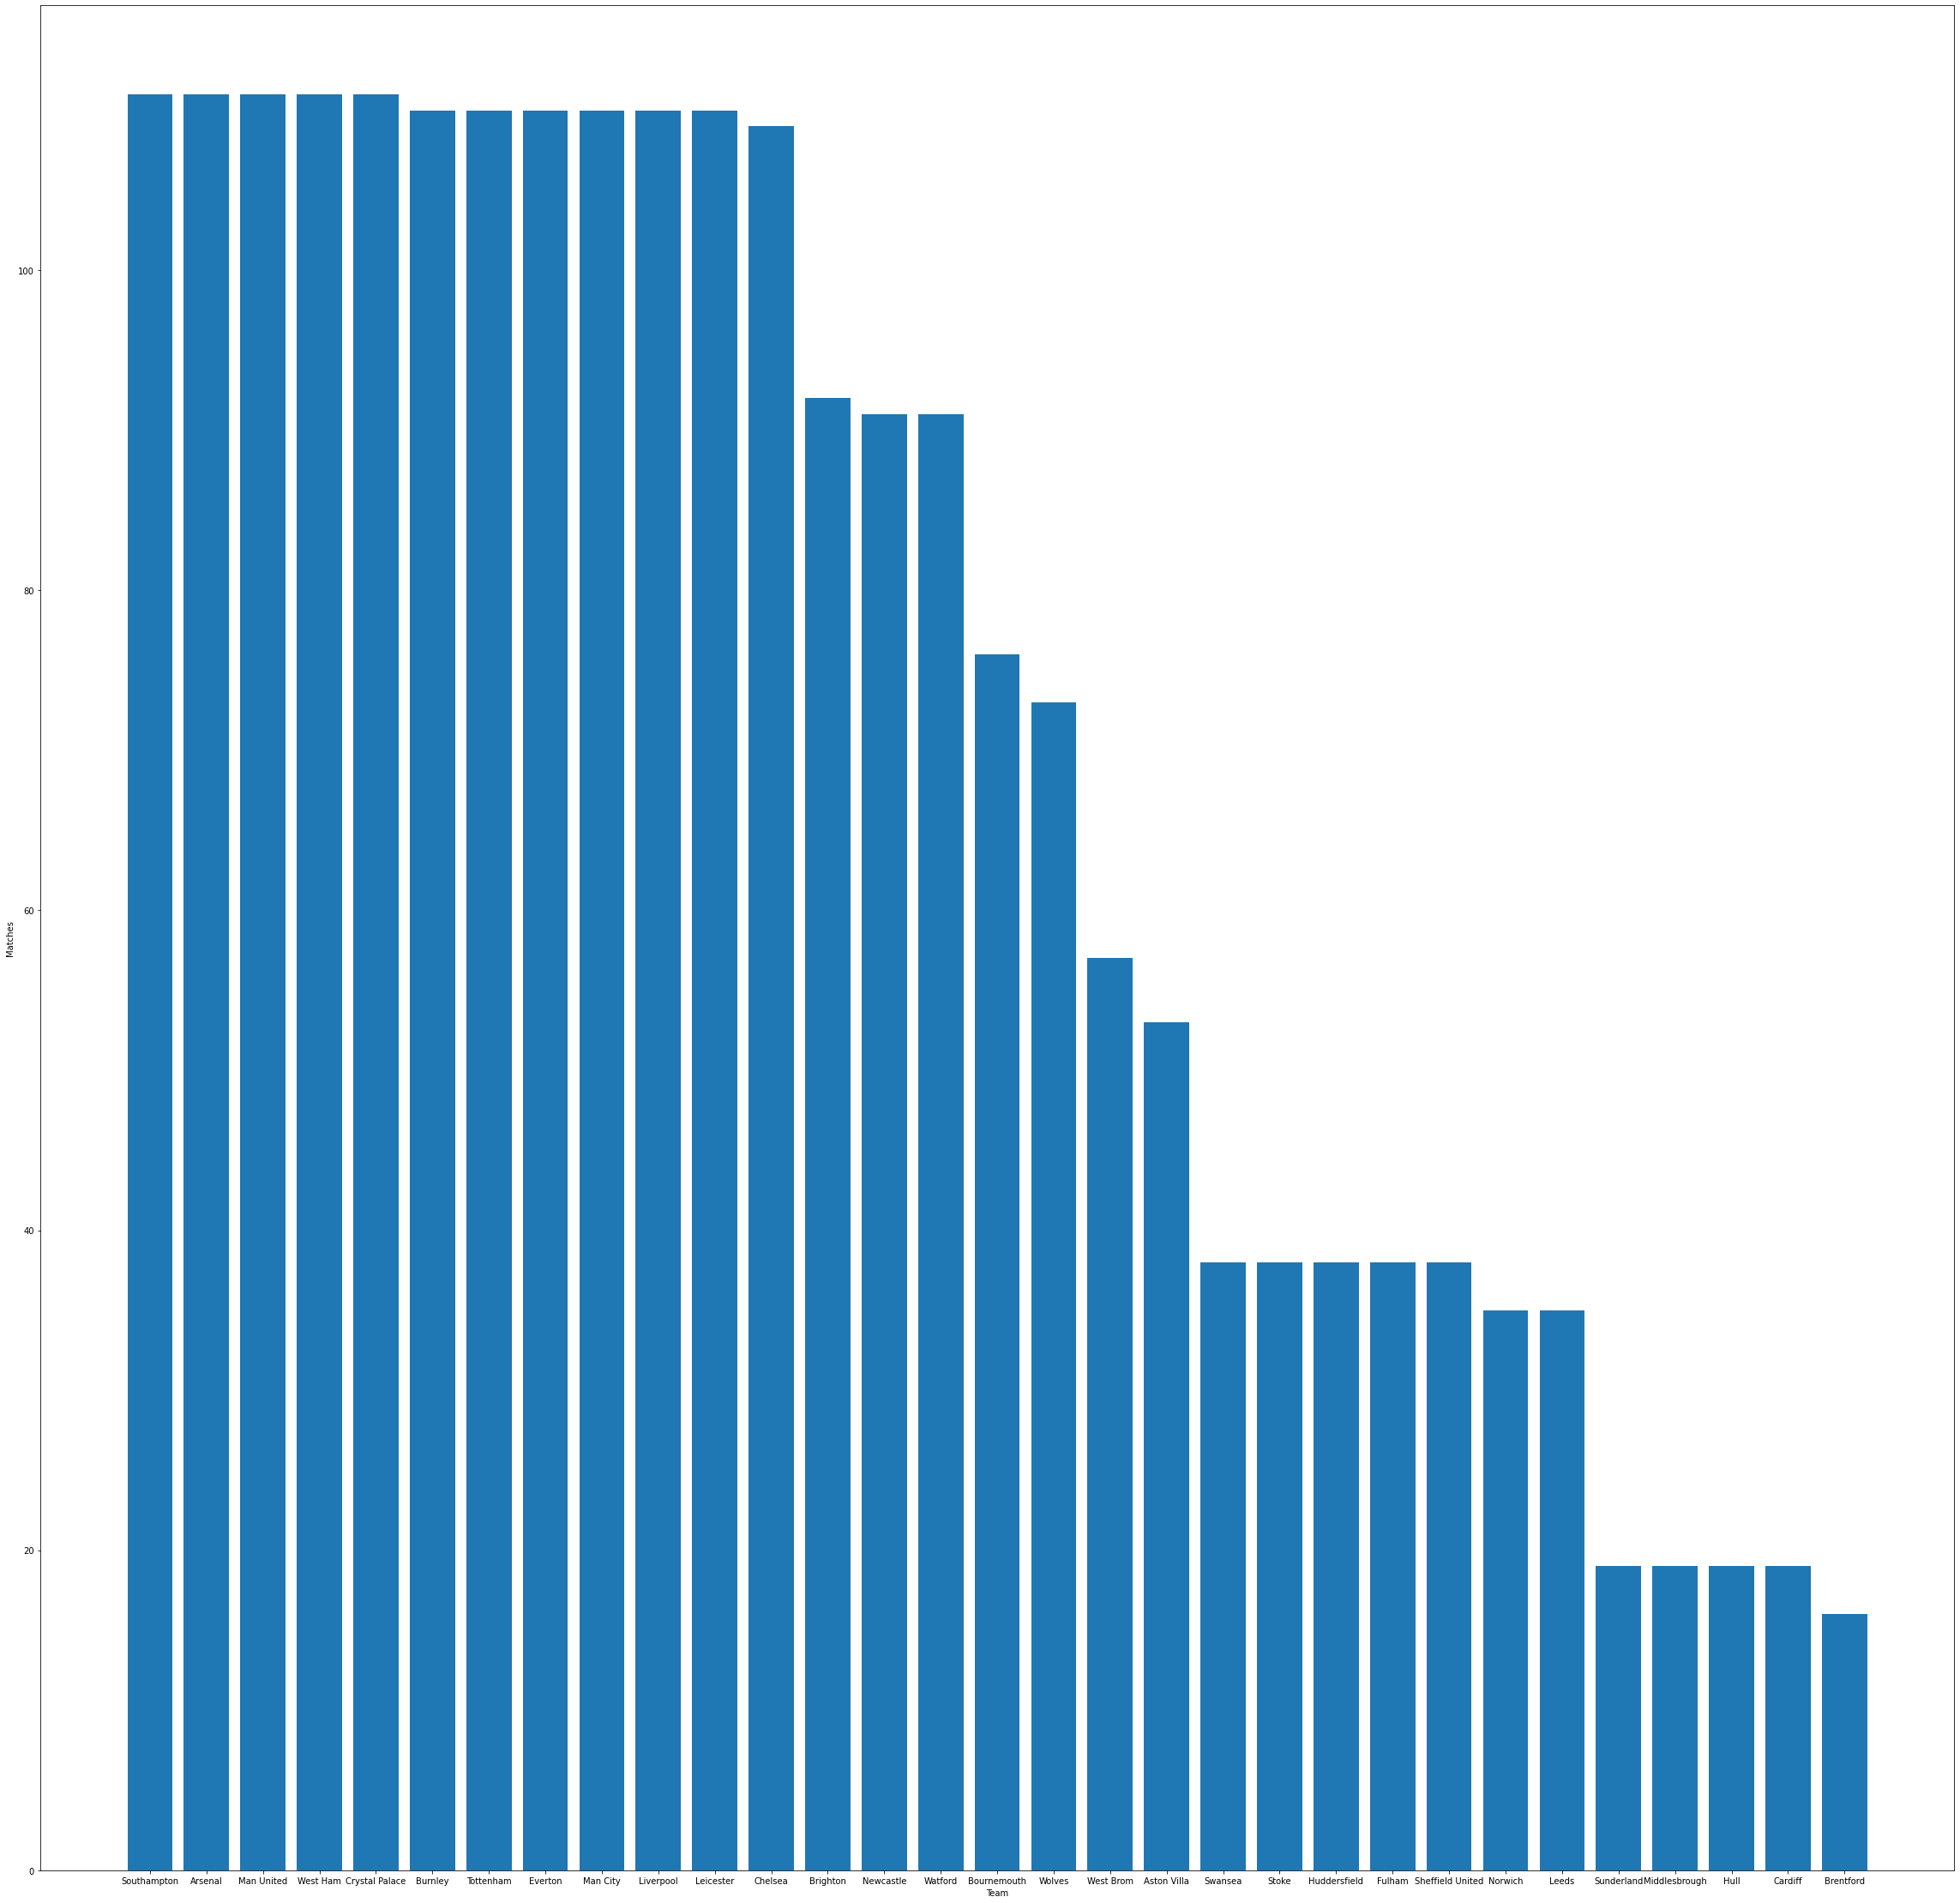

In [ ]:
fig,ax=plt.subplots(figsize=(40, 40))
Team_home=data['HomeTeam'].value_counts()
Team_away=data['AwayTeam'].value_counts()

Index_home=Team_home.index
Resuls_home=Team_home.values


Index_away=Team_away.index
Resuls_away=Team_away.values


ax.bar(Index_home,Resuls_home)

#ax.set_xlabel('Result')
#ax.set_ylabel('Index')
#plt.hist(Team_home,bins=30)
#plt.hist(Team_away,bins=30)

ax.set_xlabel("Team")
ax.set_ylabel("Matches")


Text(0, 0.5, 'Matches')

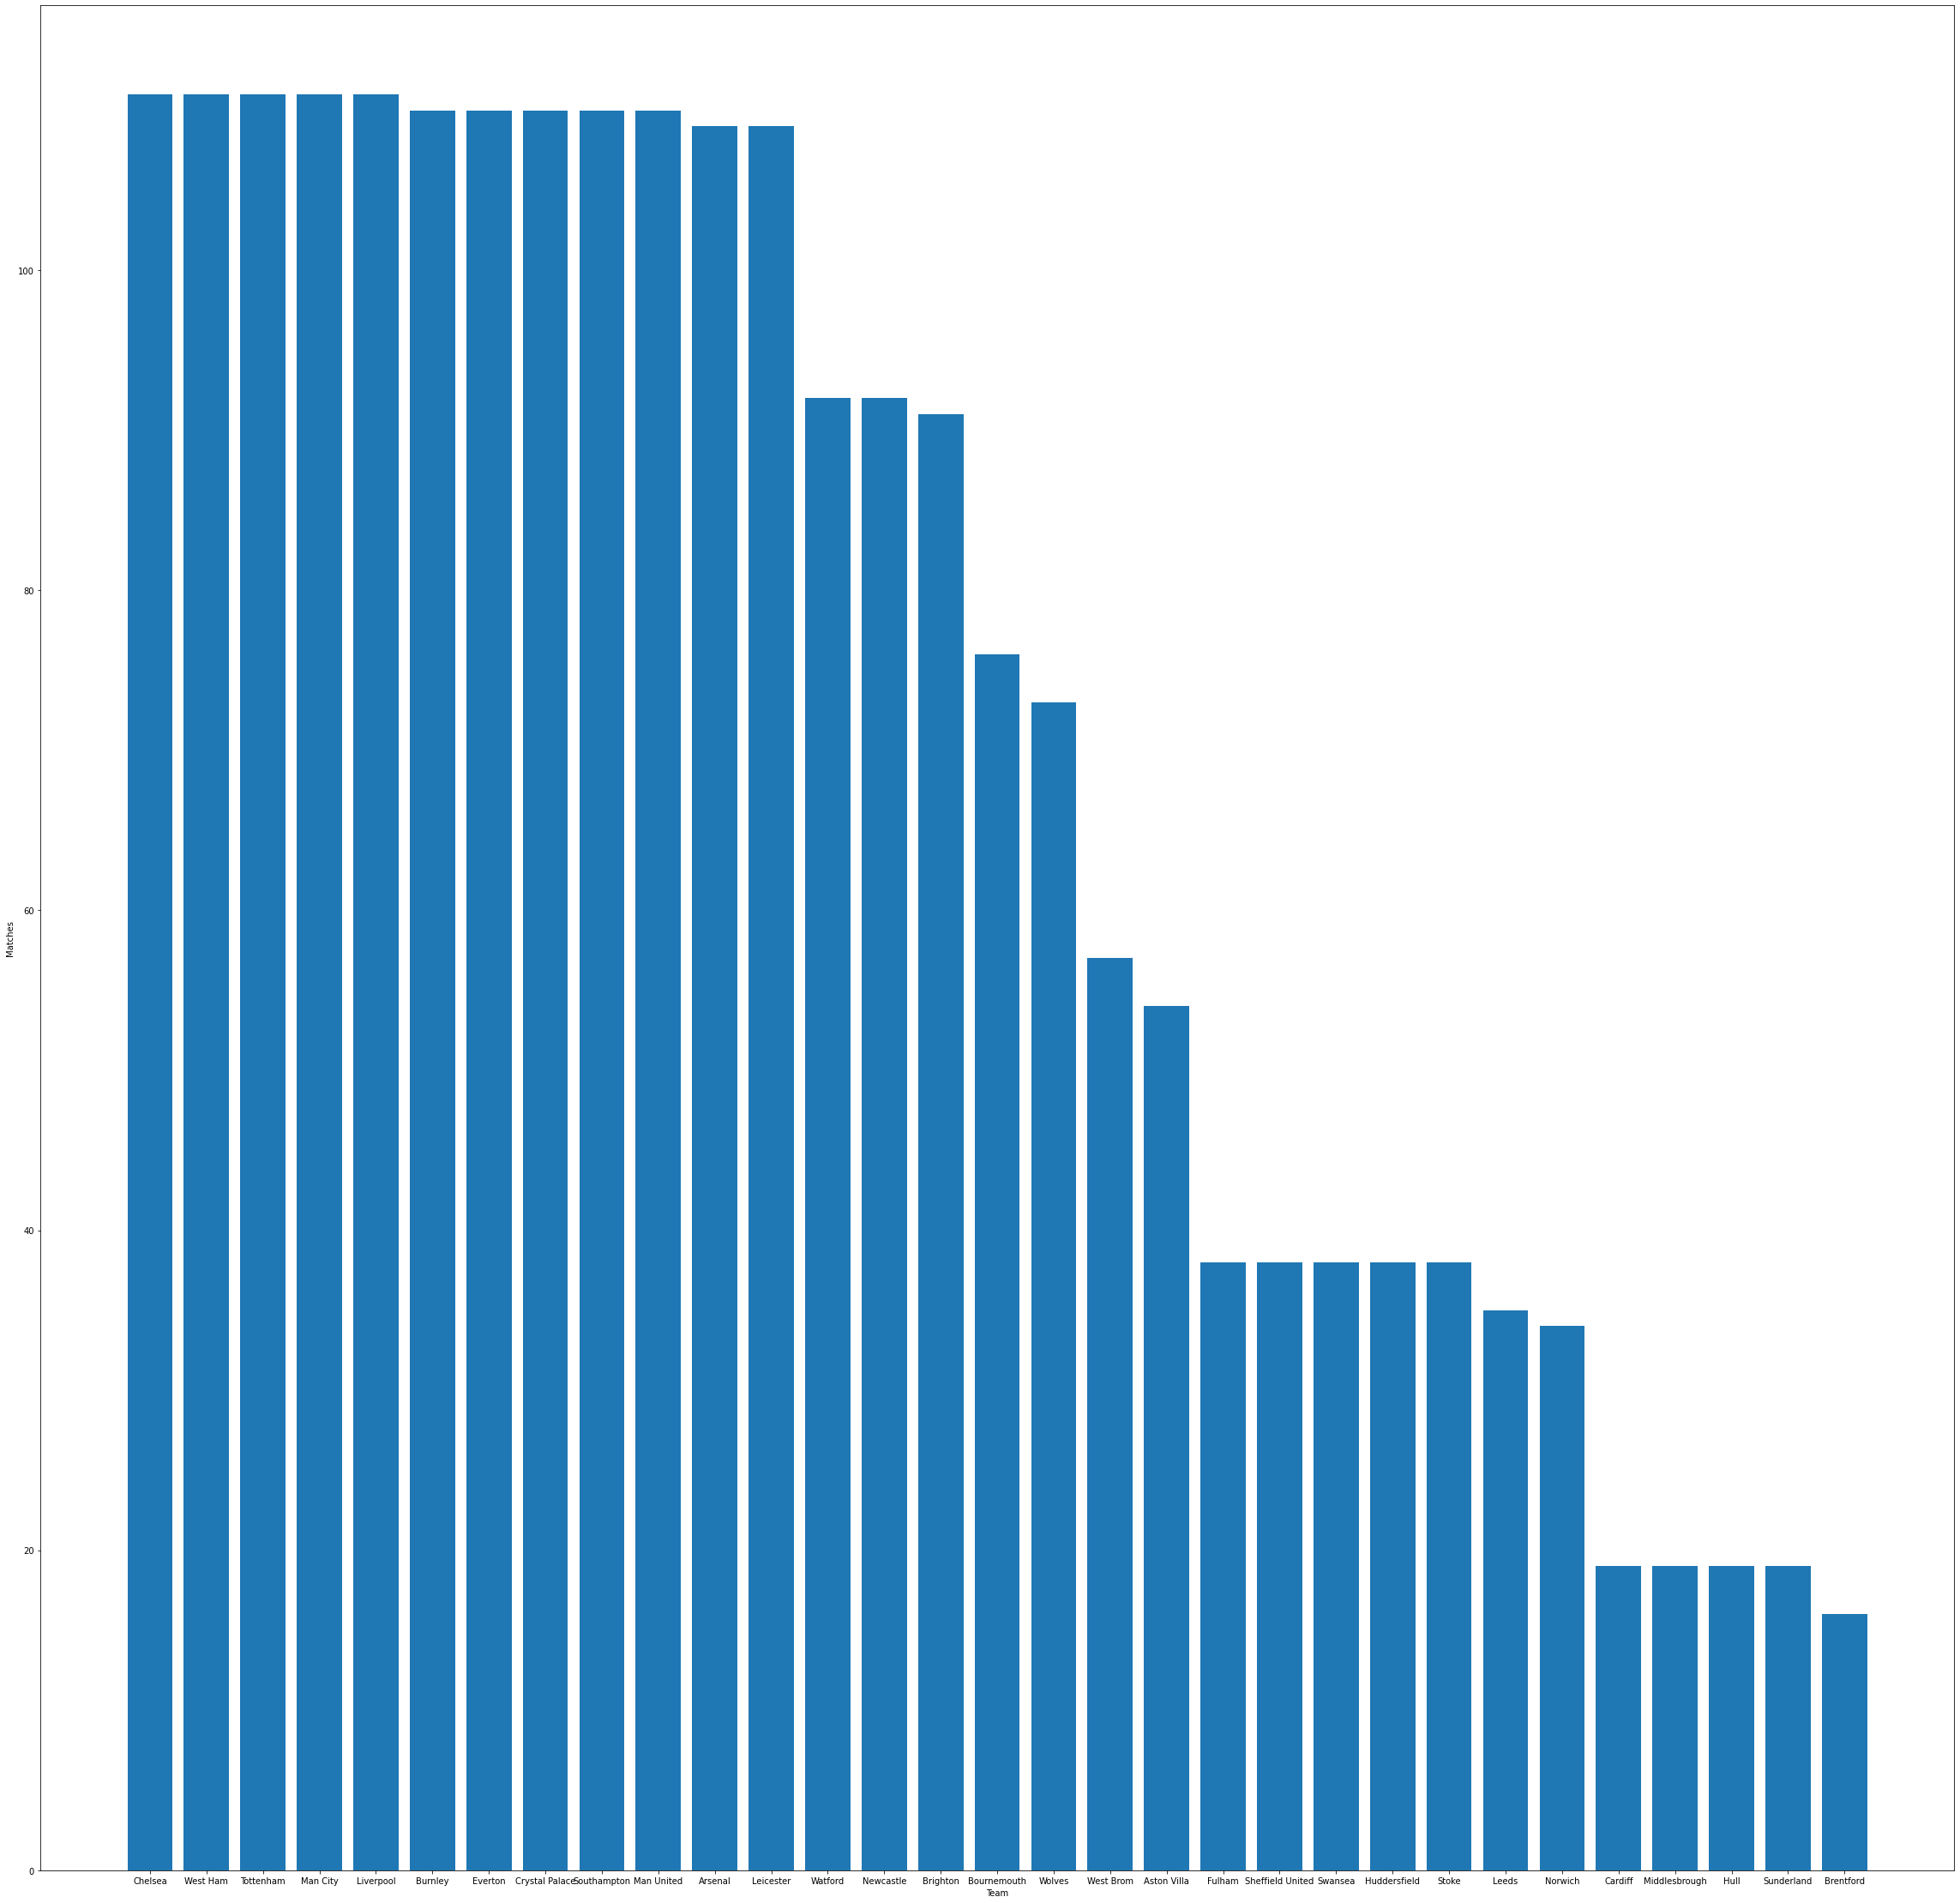

In [ ]:
fig,ax=plt.subplots(figsize=(40, 40))
Team_away=data['AwayTeam'].value_counts()

Index_away=Team_away.index
Resuls_away=Team_away.values


ax.bar(Index_away,Resuls_away)

#ax.set_xlabel('Result')
#ax.set_ylabel('Index')
#plt.hist(Team_home,bins=30)
#plt.hist(Team_away,bins=30)

ax.set_xlabel("Team")
ax.set_ylabel("Matches")


In [ ]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['FTR'])
one_hot_encoded_data

Season              DateTime        HomeTeam        AwayTeam  FTHG  \
8904   2016-17  2016-08-13T00:00:00Z         Burnley         Swansea     0   
8905   2016-17  2016-08-13T00:00:00Z  Crystal Palace       West Brom     0   
8906   2016-17  2016-08-13T00:00:00Z         Everton       Tottenham     1   
8907   2016-17  2016-08-13T00:00:00Z            Hull       Leicester     2   
8908   2016-17  2016-08-13T00:00:00Z        Man City      Sunderland     2   
...        ...                   ...             ...             ...   ...   
11108  2021-22  2022-04-09T17:30:00Z     Aston Villa       Tottenham     0   
11109  2021-22  2022-04-10T14:00:00Z       Brentford        West Ham     2   
11110  2021-22  2022-04-10T14:00:00Z       Leicester  Crystal Palace     2   
11111  2021-22  2022-04-10T14:00:00Z         Norwich         Burnley     2   
11112  2021-22  2022-04-10T16:30:00Z        Man City       Liverpool     2   

       FTAG  HTHG  HTAG HTR     Referee  ...   AC    HF    AF   HY   AY   HR  \
8904      1   0.0   0.0   D      J Moss  ...  4.0  10.0  14.0  3.0  2.0  0.0   
8905      1   0.0   0.0   D    C Pawson  ...  6.0  12.0  15.0  2.0  2.0  0.0   
8906      1   1.0   0.0   H  M Atkinson  ...  6.0  10.0  14.0  0.0  0.0  0.0   
8907      1   1.0   0.0   H      M Dean  ...  3.0   8.0  17.0  2.0  2.0  0.0   
8908      1   1.0   0.0   H    R Madley  ...  6.0  11.0  14.0  1.0  2.0  0.0   
...     ...   ...   ...  ..         ...  ...  ...   ...   ...  ...  ...  ...   
11108     4   0.0   1.0   A     G Scott  ...  3.0  12.0  14.0  2.0  3.0  0.0   
11109     0   0.0   0.0   D  M Atkinson  ...  6.0   2.0   6.0  0.0  1.0  0.0   
11110     1   2.0   0.0   H     R Jones  ...  4.0  11.0  12.0  1.0  1.0  0.0   
11111     0   1.0   0.0   H    M Oliver  ...  7.0  12.0  10.0  1.0  1.0  0.0   
11112     2   2.0   1.0   H    A Taylor  ...  1.0   9.0  11.0  1.0  4.0  0.0   

        AR  FTR_A  FTR_D  FTR_H  
8904   0.0      1      0      0  
8905   0.0      1      0      0  
8906   0.0      0      1      0  
8907   0.0      0      0      1  
8908   0.0      0      0      1  
...    ...    ...    ...    ...  
11108  0.0      1      0      0  
11109  0.0      0      0      1  
11110  0.0      0      0      1  
11111  0.0      0      0      1  
11112  0.0      0      1      0  

[2209 rows x 25 columns]

In [ ]:
one_hot_encoded_data_numeric=data.drop(['Season','DateTime','HomeTeam','AwayTeam'],axis=1)
one_hot_encoded_data_numeric

FTHG  FTAG FTR  HTHG  HTAG HTR     Referee    HS    AS  HST  AST   HC  \
8904      0     1   A   0.0   0.0   D      J Moss  10.0  17.0  3.0  9.0  7.0   
8905      0     1   A   0.0   0.0   D    C Pawson  14.0  13.0  4.0  3.0  3.0   
8906      1     1   D   1.0   0.0   H  M Atkinson  12.0  13.0  6.0  4.0  5.0   
8907      2     1   H   1.0   0.0   H      M Dean  14.0  18.0  5.0  5.0  5.0   
8908      2     1   H   1.0   0.0   H    R Madley  16.0   7.0  4.0  3.0  9.0   
...     ...   ...  ..   ...   ...  ..         ...   ...   ...  ...  ...  ...   
11108     0     4   A   0.0   1.0   A     G Scott   9.0  11.0  8.0  5.0  9.0   
11109     2     0   H   0.0   0.0   D  M Atkinson  15.0   5.0  7.0  1.0  4.0   
11110     2     1   H   2.0   0.0   H     R Jones  12.0  11.0  3.0  3.0  3.0   
11111     2     0   H   1.0   0.0   H    M Oliver  17.0  18.0  6.0  4.0  6.0   
11112     2     2   D   2.0   1.0   H    A Taylor  11.0   6.0  5.0  4.0  4.0   

        AC    HF    AF   HY   AY   HR   AR  
8904   4.0  10.0  14.0  3.0  2.0  0.0  0.0  
8905   6.0  12.0  15.0  2.0  2.0  0.0  0.0  
8906   6.0  10.0  14.0  0.0  0.0  0.0  0.0  
8907   3.0   8.0  17.0  2.0  2.0  0.0  0.0  
8908   6.0  11.0  14.0  1.0  2.0  0.0  0.0  
...    ...   ...   ...  ...  ...  ...  ...  
11108  3.0  12.0  14.0  2.0  3.0  0.0  0.0  
11109  6.0   2.0   6.0  0.0  1.0  0.0  0.0  
11110  4.0  11.0  12.0  1.0  1.0  0.0  0.0  
11111  7.0  12.0  10.0  1.0  1.0  0.0  0.0  
11112  1.0   9.0  11.0  1.0  4.0  0.0  0.0  

[2209 rows x 19 columns]

In [ ]:
columns=one_hot_encoded_data_numeric.drop(['FTR_A','FTR_D','FTR_H','Referee'],axis=1)
columns

FTHG  FTAG  HTHG  HTAG HTR    HS    AS  HST  AST   HC   AC    HF    AF  \
8904      0     1   0.0   0.0   D  10.0  17.0  3.0  9.0  7.0  4.0  10.0  14.0   
8905      0     1   0.0   0.0   D  14.0  13.0  4.0  3.0  3.0  6.0  12.0  15.0   
8906      1     1   1.0   0.0   H  12.0  13.0  6.0  4.0  5.0  6.0  10.0  14.0   
8907      2     1   1.0   0.0   H  14.0  18.0  5.0  5.0  5.0  3.0   8.0  17.0   
8908      2     1   1.0   0.0   H  16.0   7.0  4.0  3.0  9.0  6.0  11.0  14.0   
...     ...   ...   ...   ...  ..   ...   ...  ...  ...  ...  ...   ...   ...   
11108     0     4   0.0   1.0   A   9.0  11.0  8.0  5.0  9.0  3.0  12.0  14.0   
11109     2     0   0.0   0.0   D  15.0   5.0  7.0  1.0  4.0  6.0   2.0   6.0   
11110     2     1   2.0   0.0   H  12.0  11.0  3.0  3.0  3.0  4.0  11.0  12.0   
11111     2     0   1.0   0.0   H  17.0  18.0  6.0  4.0  6.0  7.0  12.0  10.0   
11112     2     2   2.0   1.0   H  11.0   6.0  5.0  4.0  4.0  1.0   9.0  11.0   

        HY   AY   HR   AR  
8904   3.0  2.0  0.0  0.0  
8905   2.0  2.0  0.0  0.0  
8906   0.0  0.0  0.0  0.0  
8907   2.0  2.0  0.0  0.0  
8908   1.0  2.0  0.0  0.0  
...    ...  ...  ...  ...  
11108  2.0  3.0  0.0  0.0  
11109  0.0  1.0  0.0  0.0  
11110  1.0  1.0  0.0  0.0  
11111  1.0  1.0  0.0  0.0  
11112  1.0  4.0  0.0  0.0  

[2209 rows x 17 columns]

In [ ]:
c2=pd.DataFrame(columns)
c3=c2.columns
c3

Index(['FTHG', 'FTAG', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HC',
       'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')

In [ ]:
droped=data.drop(['Season','DateTime','HomeTeam','AwayTeam'],axis=1)
droped

FTHG  FTAG FTR  HTHG  HTAG HTR     Referee    HS    AS  HST  AST   HC  \
8904      0     1   A   0.0   0.0   D      J Moss  10.0  17.0  3.0  9.0  7.0   
8905      0     1   A   0.0   0.0   D    C Pawson  14.0  13.0  4.0  3.0  3.0   
8906      1     1   D   1.0   0.0   H  M Atkinson  12.0  13.0  6.0  4.0  5.0   
8907      2     1   H   1.0   0.0   H      M Dean  14.0  18.0  5.0  5.0  5.0   
8908      2     1   H   1.0   0.0   H    R Madley  16.0   7.0  4.0  3.0  9.0   
...     ...   ...  ..   ...   ...  ..         ...   ...   ...  ...  ...  ...   
11108     0     4   A   0.0   1.0   A     G Scott   9.0  11.0  8.0  5.0  9.0   
11109     2     0   H   0.0   0.0   D  M Atkinson  15.0   5.0  7.0  1.0  4.0   
11110     2     1   H   2.0   0.0   H     R Jones  12.0  11.0  3.0  3.0  3.0   
11111     2     0   H   1.0   0.0   H    M Oliver  17.0  18.0  6.0  4.0  6.0   
11112     2     2   D   2.0   1.0   H    A Taylor  11.0   6.0  5.0  4.0  4.0   

        AC    HF    AF   HY   AY   HR   AR  
8904   4.0  10.0  14.0  3.0  2.0  0.0  0.0  
8905   6.0  12.0  15.0  2.0  2.0  0.0  0.0  
8906   6.0  10.0  14.0  0.0  0.0  0.0  0.0  
8907   3.0   8.0  17.0  2.0  2.0  0.0  0.0  
8908   6.0  11.0  14.0  1.0  2.0  0.0  0.0  
...    ...   ...   ...  ...  ...  ...  ...  
11108  3.0  12.0  14.0  2.0  3.0  0.0  0.0  
11109  6.0   2.0   6.0  0.0  1.0  0.0  0.0  
11110  4.0  11.0  12.0  1.0  1.0  0.0  0.0  
11111  7.0  12.0  10.0  1.0  1.0  0.0  0.0  
11112  1.0   9.0  11.0  1.0  4.0  0.0  0.0  

[2209 rows x 19 columns]

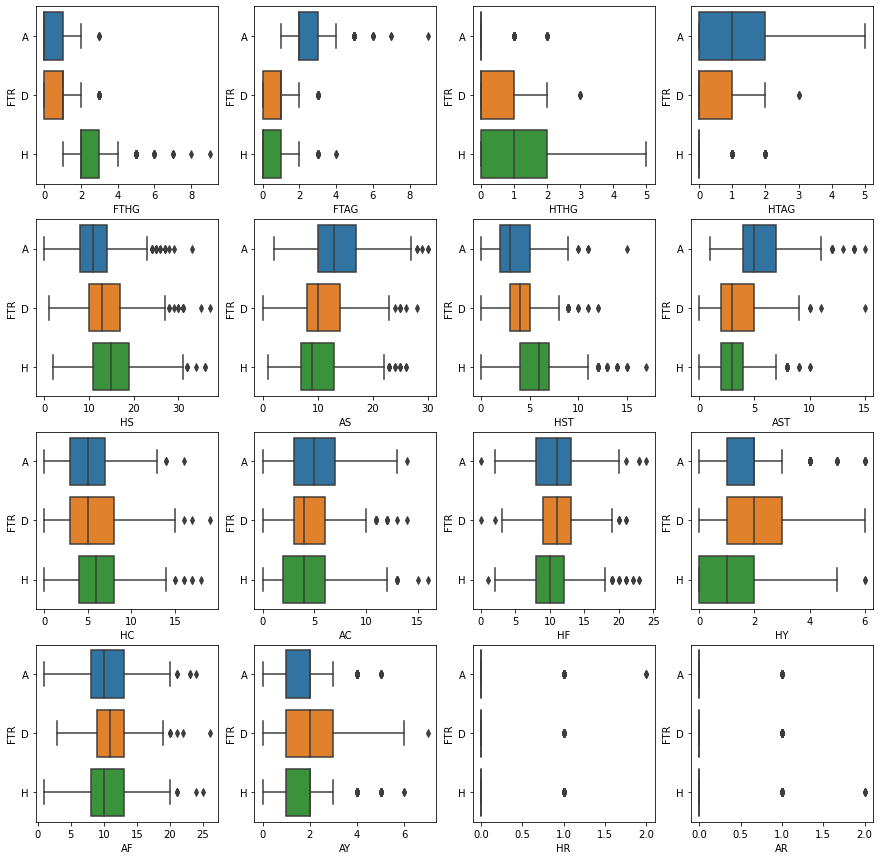

In [ ]:
#for column in enumerate(columns):
#ax=fig.add_axes([0, 0, 1, 1])
f, axes = plt.subplots(4,4,figsize=(15, 15))
#box_coded=one_hot_encoded_data_numeric[["FTR_A","FTR_D","FTR_H"]]
#box_coded_1=[columns['FTHG'],data['FTR']]
#box_coded

#box_data=[columns,one_hot_encoded_data_numeric["FTR_A"]]
#bp =ax.boxplot(box_coded_1)
#plt.show()
#sns.boxplot(x=columns['FTAG'],y=data['FTR'])
#sns.boxplot(x=columns['FTAG'],y=data['FTR'])
i=1
#for name in (columns):
  #sns.boxplot(x="FTHG",y="FTR", ax=axes[i])
  #i+=1
#plt.tight_layout()
sns.boxplot(x=columns['FTHG'],y=data['FTR'], ax=axes[0][0])
sns.boxplot(x=columns['FTAG'],y=data['FTR'], ax=axes[0][1])
sns.boxplot(x=columns['HTHG'],y=data['FTR'], ax=axes[0][2])
sns.boxplot(x=columns['HTAG'],y=data['FTR'], ax=axes[0][3])
sns.boxplot(x=columns['HS'],y=data['FTR'], ax=axes[1][0])
sns.boxplot(x=columns['AS'],y=data['FTR'], ax=axes[1][1])
sns.boxplot(x=columns['HST'],y=data['FTR'], ax=axes[1][2])
sns.boxplot(x=columns['AST'],y=data['FTR'], ax=axes[1][3])
sns.boxplot(x=columns['HC'],y=data['FTR'], ax=axes[2][0])
sns.boxplot(x=columns['AC'],y=data['FTR'], ax=axes[2][1])
sns.boxplot(x=columns['HF'],y=data['FTR'], ax=axes[2][2])
sns.boxplot(x=columns['HY'],y=data['FTR'], ax=axes[2][3])
sns.boxplot(x=columns['AF'],y=data['FTR'], ax=axes[3][0])
sns.boxplot(x=columns['AY'],y=data['FTR'], ax=axes[3][1])
sns.boxplot(x=columns['HR'],y=data['FTR'], ax=axes[3][2])
sns.boxplot(x=columns['AR'],y=data['FTR'], ax=axes[3][3])

#ax.boxplot(x=columns['HTHG'],y=data['FTR'])

#sns.boxplot(x=columns[["FTHG","FTAG","HTHG"	,"HTAG"	,"HTR",	"HS","AS","HST","AST","HC","AC","HF","AF","HY","AY","HR","AR"]],y=data['FTR'])

In [ ]:
# 0000000000000000000000000000000000000000000000000000000


data_copy=data.copy()
data_copy.drop('Referee', axis=1, inplace=True)
data_copy.head()


Season              DateTime        HomeTeam    AwayTeam  FTHG  FTAG  \
8904  2016-17  2016-08-13T00:00:00Z         Burnley     Swansea     0     1   
8905  2016-17  2016-08-13T00:00:00Z  Crystal Palace   West Brom     0     1   
8906  2016-17  2016-08-13T00:00:00Z         Everton   Tottenham     1     1   
8907  2016-17  2016-08-13T00:00:00Z            Hull   Leicester     2     1   
8908  2016-17  2016-08-13T00:00:00Z        Man City  Sunderland     2     1   

     FTR  HTHG  HTAG HTR  ...  HST  AST   HC   AC    HF    AF   HY   AY   HR  \
8904   A   0.0   0.0   D  ...  3.0  9.0  7.0  4.0  10.0  14.0  3.0  2.0  0.0   
8905   A   0.0   0.0   D  ...  4.0  3.0  3.0  6.0  12.0  15.0  2.0  2.0  0.0   
8906   D   1.0   0.0   H  ...  6.0  4.0  5.0  6.0  10.0  14.0  0.0  0.0  0.0   
8907   H   1.0   0.0   H  ...  5.0  5.0  5.0  3.0   8.0  17.0  2.0  2.0  0.0   
8908   H   1.0   0.0   H  ...  4.0  3.0  9.0  6.0  11.0  14.0  1.0  2.0  0.0   

       AR  
8904  0.0  
8905  0.0  
8906  0.0  
8907  0.0  
8908  0.0  

[5 rows x 22 columns]

In [ ]:
data_copy["matchDate"] = pd.to_datetime(data_copy["DateTime"], infer_datetime_format=True)
data_copy['matchDay'] = data_copy['matchDate'].dt.day_name()
print(data_copy["matchDate"][8904])
print(data_copy['matchDay'][9052])
data_copy.drop('DateTime', axis=1, inplace=True)
data_copy.drop('matchDate', axis=1, inplace=True)
data_copy.head()

2016-08-13 00:00:00
Sunday


Season        HomeTeam    AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
8904  2016-17         Burnley     Swansea     0     1   A   0.0   0.0   D   
8905  2016-17  Crystal Palace   West Brom     0     1   A   0.0   0.0   D   
8906  2016-17         Everton   Tottenham     1     1   D   1.0   0.0   H   
8907  2016-17            Hull   Leicester     2     1   H   1.0   0.0   H   
8908  2016-17        Man City  Sunderland     2     1   H   1.0   0.0   H   

        HS  ...  AST   HC   AC    HF    AF   HY   AY   HR   AR  matchDay  
8904  10.0  ...  9.0  7.0  4.0  10.0  14.0  3.0  2.0  0.0  0.0  Saturday  
8905  14.0  ...  3.0  3.0  6.0  12.0  15.0  2.0  2.0  0.0  0.0  Saturday  
8906  12.0  ...  4.0  5.0  6.0  10.0  14.0  0.0  0.0  0.0  0.0  Saturday  
8907  14.0  ...  5.0  5.0  3.0   8.0  17.0  2.0  2.0  0.0  0.0  Saturday  
8908  16.0  ...  3.0  9.0  6.0  11.0  14.0  1.0  2.0  0.0  0.0  Saturday  

[5 rows x 22 columns]

In [ ]:
data_copy = pd.get_dummies(data_copy, columns = ['HomeTeam'])
data_copy = pd.get_dummies(data_copy, columns = ['AwayTeam'])
data_copy = pd.get_dummies(data_copy, columns = ['HTR'])
data_copy = pd.get_dummies(data_copy, columns = ['matchDay'])
data_copy.head()

Season  FTHG  FTAG FTR  HTHG  HTAG    HS    AS  HST  AST  ...  HTR_A  \
8904  2016-17     0     1   A   0.0   0.0  10.0  17.0  3.0  9.0  ...      0   
8905  2016-17     0     1   A   0.0   0.0  14.0  13.0  4.0  3.0  ...      0   
8906  2016-17     1     1   D   1.0   0.0  12.0  13.0  6.0  4.0  ...      0   
8907  2016-17     2     1   H   1.0   0.0  14.0  18.0  5.0  5.0  ...      0   
8908  2016-17     2     1   H   1.0   0.0  16.0   7.0  4.0  3.0  ...      0   

      HTR_D  HTR_H  matchDay_Friday  matchDay_Monday  matchDay_Saturday  \
8904      1      0                0                0                  1   
8905      1      0                0                0                  1   
8906      0      1                0                0                  1   
8907      0      1                0                0                  1   
8908      0      1                0                0                  1   

      matchDay_Sunday  matchDay_Thursday  matchDay_Tuesday  matchDay_Wednesday  
8904                0                  0                 0                   0  
8905                0                  0                 0                   0  
8906                0                  0                 0                   0  
8907                0                  0                 0                   0  
8908                0                  0                 0                   0  

[5 rows x 90 columns]

In [ ]:
data_copy['HomeTeam_Arsenal']

8904     0
8905     0
8906     0
8907     0
8908     0
        ..
11108    0
11109    0
11110    0
11111    0
11112    0
Name: HomeTeam_Arsenal, Length: 2209, dtype: uint8

In [ ]:
label_encoder = LabelEncoder()
data_copy['FTR']=label_encoder.fit_transform(data_copy['FTR'])

In [ ]:
unique_values=[]
for i in (data_copy['FTR']):
  if (i not in unique_values):
    unique_values.append(i)
print(unique_values)

[0, 1, 2]


In [ ]:
label_encoder = LabelEncoder()
data_copy['FTR']= label_encoder.fit_transform(data_copy['FTR'])
print('Unique values: ', data_copy['FTR'].unique())
print('home team wins ', unique_values[2])
print('away team wins', unique_values[0])
print('tie', unique_values[1])
label = data_copy['FTR']
print('the result for the match in row 9052 is ', label[9052])
print(data_copy.iloc[:,4:90])
features = data_copy.iloc[:,4:90]


Unique values:  [0 1 2]
home team wins  2
away team wins 0
tie 1
the result for the match in row 9052 is  2
       HTHG  HTAG    HS    AS  HST  AST   HC   AC    HF    AF  ...  HTR_A  \
8904    0.0   0.0  10.0  17.0  3.0  9.0  7.0  4.0  10.0  14.0  ...      0   
8905    0.0   0.0  14.0  13.0  4.0  3.0  3.0  6.0  12.0  15.0  ...      0   
8906    1.0   0.0  12.0  13.0  6.0  4.0  5.0  6.0  10.0  14.0  ...      0   
8907    1.0   0.0  14.0  18.0  5.0  5.0  5.0  3.0   8.0  17.0  ...      0   
8908    1.0   0.0  16.0   7.0  4.0  3.0  9.0  6.0  11.0  14.0  ...      0   
...     ...   ...   ...   ...  ...  ...  ...  ...   ...   ...  ...    ...   
11108   0.0   1.0   9.0  11.0  8.0  5.0  9.0  3.0  12.0  14.0  ...      1   
11109   0.0   0.0  15.0   5.0  7.0  1.0  4.0  6.0   2.0   6.0  ...      0   
11110   2.0   0.0  12.0  11.0  3.0  3.0  3.0  4.0  11.0  12.0  ...      0   
11111   1.0   0.0  17.0  18.0  6.0  4.0  6.0  7.0  12.0  10.0  ...      0   
11112   2.0   1.0  11.0   6.0  5.0  4.0  4.0 

In [ ]:
data_copy

Season  FTHG  FTAG  FTR  HTHG  HTAG    HS    AS  HST  AST  ...  HTR_A  \
8904   2016-17     0     1    0   0.0   0.0  10.0  17.0  3.0  9.0  ...      0   
8905   2016-17     0     1    0   0.0   0.0  14.0  13.0  4.0  3.0  ...      0   
8906   2016-17     1     1    1   1.0   0.0  12.0  13.0  6.0  4.0  ...      0   
8907   2016-17     2     1    2   1.0   0.0  14.0  18.0  5.0  5.0  ...      0   
8908   2016-17     2     1    2   1.0   0.0  16.0   7.0  4.0  3.0  ...      0   
...        ...   ...   ...  ...   ...   ...   ...   ...  ...  ...  ...    ...   
11108  2021-22     0     4    0   0.0   1.0   9.0  11.0  8.0  5.0  ...      1   
11109  2021-22     2     0    2   0.0   0.0  15.0   5.0  7.0  1.0  ...      0   
11110  2021-22     2     1    2   2.0   0.0  12.0  11.0  3.0  3.0  ...      0   
11111  2021-22     2     0    2   1.0   0.0  17.0  18.0  6.0  4.0  ...      0   
11112  2021-22     2     2    1   2.0   1.0  11.0   6.0  5.0  4.0  ...      0   

       HTR_D  HTR_H  matchDay_Friday  matchDay_Monday  matchDay_Saturday  \
8904       1      0                0                0                  1   
8905       1      0                0                0                  1   
8906       0      1                0                0                  1   
8907       0      1                0                0                  1   
8908       0      1                0                0                  1   
...      ...    ...              ...              ...                ...   
11108      0      0                0                0                  1   
11109      1      0                0                0                  0   
11110      0      1                0                0                  0   
11111      0      1                0                0                  0   
11112      0      1                0                0                  0   

       matchDay_Sunday  matchDay_Thursday  matchDay_Tuesday  \
8904                 0                  0                 0   
8905                 0                  0                 0   
8906                 0                  0                 0   
8907                 0                  0                 0   
8908                 0                  0                 0   
...                ...                ...               ...   
11108                0                  0                 0   
11109                1                  0                 0   
11110                1                  0                 0   
11111                1                  0                 0   
11112                1                  0                 0   

       matchDay_Wednesday  
8904                    0  
8905                    0  
8906                    0  
8907                    0  
8908                    0  
...                   ...  
11108                   0  
11109                   0  
11110                   0  
11111                   0  
11112                   0  

[2209 rows x 90 columns]

In [ ]:
data_copy['FTR']

8904     0
8905     0
8906     1
8907     2
8908     2
        ..
11108    0
11109    2
11110    2
11111    2
11112    1
Name: FTR, Length: 2209, dtype: int64

In [114]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# train -> features = data_copy.iloc[:,4:90]
# make it numpy array so the keras model accept it by using " .values "
X = features_1

# target -> label = data_copy['FTR']
# make it numpy array so the keras model accept it by using " .values "
y = label_1

# split the data train and test for the target and the features 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)


model = Sequential()
model.add(Dense(20, input_dim=86, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))
# compile the keras model
model.compile(loss='mse', optimizer='adam')
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=2)
# evaluate on test set

# yhat = np.argmax(model.predict(X_test),axis=-1)

yhat = model.predict(X_test)
error = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % error)
print(yhat)

# print(np.argmax(yhat,axis=1))

# acc = accuracy_score(y_test, yhat)
# print('Accuracy: %.3f' % acc)

Epoch 1/150
49/49 - 1s - loss: 3.7958 - 595ms/epoch - 12ms/step
Epoch 2/150
49/49 - 0s - loss: 1.1451 - 74ms/epoch - 2ms/step
Epoch 3/150
49/49 - 0s - loss: 0.7691 - 87ms/epoch - 2ms/step
Epoch 4/150
49/49 - 0s - loss: 0.6311 - 91ms/epoch - 2ms/step
Epoch 5/150
49/49 - 0s - loss: 0.5688 - 92ms/epoch - 2ms/step
Epoch 6/150
49/49 - 0s - loss: 0.5312 - 74ms/epoch - 2ms/step
Epoch 7/150
49/49 - 0s - loss: 0.4947 - 92ms/epoch - 2ms/step
Epoch 8/150
49/49 - 0s - loss: 0.4726 - 83ms/epoch - 2ms/step
Epoch 9/150
49/49 - 0s - loss: 0.4581 - 88ms/epoch - 2ms/step
Epoch 10/150
49/49 - 0s - loss: 0.4376 - 83ms/epoch - 2ms/step
Epoch 11/150
49/49 - 0s - loss: 0.4234 - 89ms/epoch - 2ms/step
Epoch 12/150
49/49 - 0s - loss: 0.4125 - 73ms/epoch - 1ms/step
Epoch 13/150
49/49 - 0s - loss: 0.4043 - 98ms/epoch - 2ms/step
Epoch 14/150
49/49 - 0s - loss: 0.3902 - 76ms/epoch - 2ms/step
Epoch 15/150
49/49 - 0s - loss: 0.3852 - 70ms/epoch - 1ms/step
Epoch 16/150
49/49 - 0s - loss: 0.3784 - 93ms/epoch - 2ms/step

In [115]:
print(y)

[0 0 1 ... 2 2 1]


In [116]:
X_test

HTHG  HTAG    HS    AS  HST  AST    HC   AC    HF    AF  ...  HTR_A  \
10306   1.0   0.0  18.0   8.0  9.0  2.0   7.0  5.0  15.0  11.0  ...      0   
10483   0.0   1.0   5.0  16.0  1.0  8.0   2.0  5.0  14.0   6.0  ...      1   
9936    2.0   0.0  12.0  12.0  3.0  2.0   4.0  7.0   8.0   8.0  ...      0   
9319    0.0   1.0   9.0  12.0  1.0  3.0   7.0  4.0   8.0  11.0  ...      1   
9105    1.0   1.0  14.0   8.0  3.0  6.0   4.0  5.0  13.0  11.0  ...      0   
...     ...   ...   ...   ...  ...  ...   ...  ...   ...   ...  ...    ...   
10423   0.0   0.0  10.0  13.0  1.0  4.0   0.0  7.0  16.0  13.0  ...      0   
9576    0.0   0.0  30.0   0.0  4.0  0.0  12.0  0.0   9.0   9.0  ...      0   
9955    0.0   1.0   8.0   8.0  1.0  5.0   6.0  5.0  14.0   9.0  ...      1   
9948    2.0   0.0  10.0  17.0  4.0  2.0   1.0  6.0   8.0  14.0  ...      0   
10331   1.0   0.0  15.0   4.0  7.0  1.0   9.0  0.0  15.0  12.0  ...      0   

       HTR_D  HTR_H  matchDay_Friday  matchDay_Monday  matchDay_Saturday  \
10306      0      1                0                0                  1   
10483      0      0                0                0                  1   
9936       0      1                0                0                  0   
9319       0      0                0                0                  1   
9105       1      0                0                0                  1   
...      ...    ...              ...              ...                ...   
10423      1      0                0                0                  0   
9576       1      0                0                0                  1   
9955       0      0                0                0                  1   
9948       0      1                0                0                  1   
10331      0      1                0                1                  0   

       matchDay_Sunday  matchDay_Thursday  matchDay_Tuesday  \
10306                0                  0                 0   
10483                0                  0                 0   
9936                 0                  0                 1   
9319                 0                  0                 0   
9105                 0                  0                 0   
...                ...                ...               ...   
10423                1                  0                 0   
9576                 0                  0                 0   
9955                 0                  0                 0   
9948                 0                  0                 0   
10331                0                  0                 0   

       matchDay_Wednesday  
10306                   0  
10483                   0  
9936                    0  
9319                    0  
9105                    0  
...                   ...  
10423                   0  
9576                    0  
9955                    0  
9948                    0  
10331                   0  

[663 rows x 86 columns]

In [117]:
Xnew = np.array([[1, 0, 0, 0, 0, 0,1, 0, 1, 0, 1, 0, 0,1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [118]:
yhat

array([[ 1.57191741e+00],
       [-1.61637906e-02],
       [ 1.54763675e+00],
       [ 6.38380229e-01],
       [ 1.05130243e+00],
       [ 6.62693083e-01],
       [ 8.15316498e-01],
       [ 5.83497822e-01],
       [ 1.93845594e+00],
       [ 1.83658600e+00],
       [ 2.66610813e+00],
       [ 1.98807812e+00],
       [ 1.85999882e+00],
       [ 2.10326481e+00],
       [-1.61637906e-02],
       [ 1.32877398e+00],
       [ 2.01549602e+00],
       [ 2.64749855e-01],
       [ 1.58233333e+00],
       [ 1.03194153e+00],
       [ 1.77805293e+00],
       [ 7.04212487e-01],
       [-1.30614325e-01],
       [ 1.09908402e+00],
       [ 5.10182440e-01],
       [ 4.23176557e-01],
       [ 1.28568459e+00],
       [ 2.24966931e+00],
       [ 1.25456393e+00],
       [ 7.53118545e-02],
       [ 3.92702818e-01],
       [ 6.48250043e-01],
       [ 1.85079849e+00],
       [ 1.61088121e+00],
       [ 1.28816402e+00],
       [ 1.86498880e+00],
       [ 2.36038470e+00],
       [ 7.63375521e-01],
       [ 1.4

In [119]:
yhat = model.predict(Xnew)
yhat
print("The predictions are: ",np.argmax(yhat,axis=1))

1/1 [==============================] - 0s 65ms/step
The predictions are:  [0]
